[*********************100%***********************]  2 of 2 completed


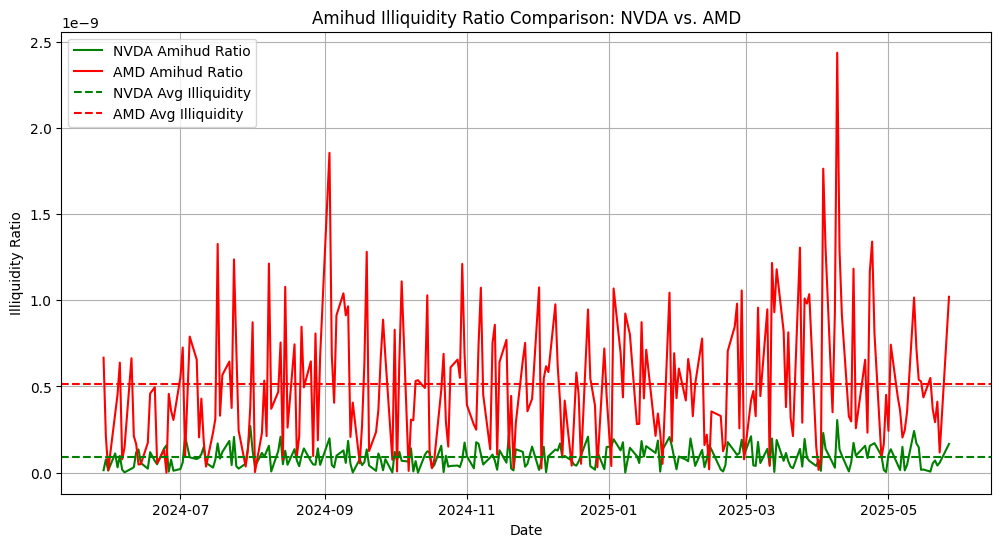

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers for NVDA and AMD
tickers = ["NVDA", "AMD"]

# Download historical daily data (1 year)
data = yf.download(tickers, period="1y", interval="1d")

# Compute daily returns (absolute percentage change)
data["NVDA Daily Return"] = data["Close"]["NVDA"].pct_change().abs()
data["AMD Daily Return"] = data["Close"]["AMD"].pct_change().abs()

# Compute Amihud Illiquidity Ratio
data["NVDA Amihud"] = data["NVDA Daily Return"] / data["Volume"]["NVDA"]
data["AMD Amihud"] = data["AMD Daily Return"] / data["Volume"]["AMD"]

# Drop NaN values (first row will be NaN due to pct_change)
data = data.dropna()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["NVDA Amihud"], label="NVDA Amihud Ratio", color="green")
plt.plot(data.index, data["AMD Amihud"], label="AMD Amihud Ratio", color="red")
plt.axhline(y=data["NVDA Amihud"].mean(), color="green", linestyle="--", label="NVDA Avg Illiquidity")
plt.axhline(y=data["AMD Amihud"].mean(), color="red", linestyle="--", label="AMD Avg Illiquidity")

plt.title("Amihud Illiquidity Ratio Comparison: NVDA vs. AMD")
plt.xlabel("Date")
plt.ylabel("Illiquidity Ratio")
plt.legend()
plt.grid(True)
plt.show()
